# Analyzing the FY21-24Q3 WMATA Service Excellence Report

##### Washington, DC's public data sharing platform provides free access to WMATA's (Washington Metropolitan Area Transit Authority) service excellence reports. These reports contain detailed sheets of transit-related data, ranging from ridership and crime incidence rates to derived measurements like crowding percents, percent service delivered, and even rail prediction accuracy. This data provides boundless possibilities for doing data science on real-world data that has great relevance to residents of the DMV and surrounding areas.

### 1. Import Libraries & Data

In [24]:
import pip
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
file = pd.ExcelFile('Service-Excellence-Report-Data-FY21-FY24-2.xlsx')  
sheet_names = file.sheet_names

In [38]:
all_sheets = pd.read_excel('Service-Excellence-Report-Data-FY21-FY24-2.xlsx', sheet_name = sheet_names)
rail_service_delivered = all_sheets['RSDEL']
rail_on_time_perf = all_sheets['RAOTP']
rail_safety_event_rate = all_sheets['RSAFE']
ridership = all_sheets['RIDER']
rail_crowding = all_sheets['RCROW']
satis = all_sheets['SATIS']
rail_info_accuracy = all_sheets['RACCU']
cust_inj_rate = all_sheets['CUSIN']
emp_hours = all_sheets['EMPHR']
emp_inj = all_sheets['EMPIN']
assaults = all_sheets['ASSAU']

### 2. Exploratory Analysis

Let's plot ridership, percent service delivered, safety event rate, and fleet reliability over time to see if we can identify any trends. Note that some of the statistics were created/revised during the data collection period and thus do not completely fill the time range.

In [27]:
months = pd.date_range(start='2020-07-01', end='2024-03-01', freq='MS')
quarters = pd.date_range(start='2020-07-01', end='2024-03-01', freq='QS')
quarter_labels = []
for q in quarters:
    if q.month == 1:
        quarter_labels.append("Q1" + " '" + str(q.year)[2:])
    elif q.month == 4:
        quarter_labels.append("Q2" + " '" + str(q.year)[2:])
    elif q.month == 7:
        quarter_labels.append("Q3" + " '" + str(q.year)[2:])
    elif q.month == 10:
        quarter_labels.append("Q4" + " '" + str(q.year)[2:])

Text(0, 0.5, 'stops on time (%)')

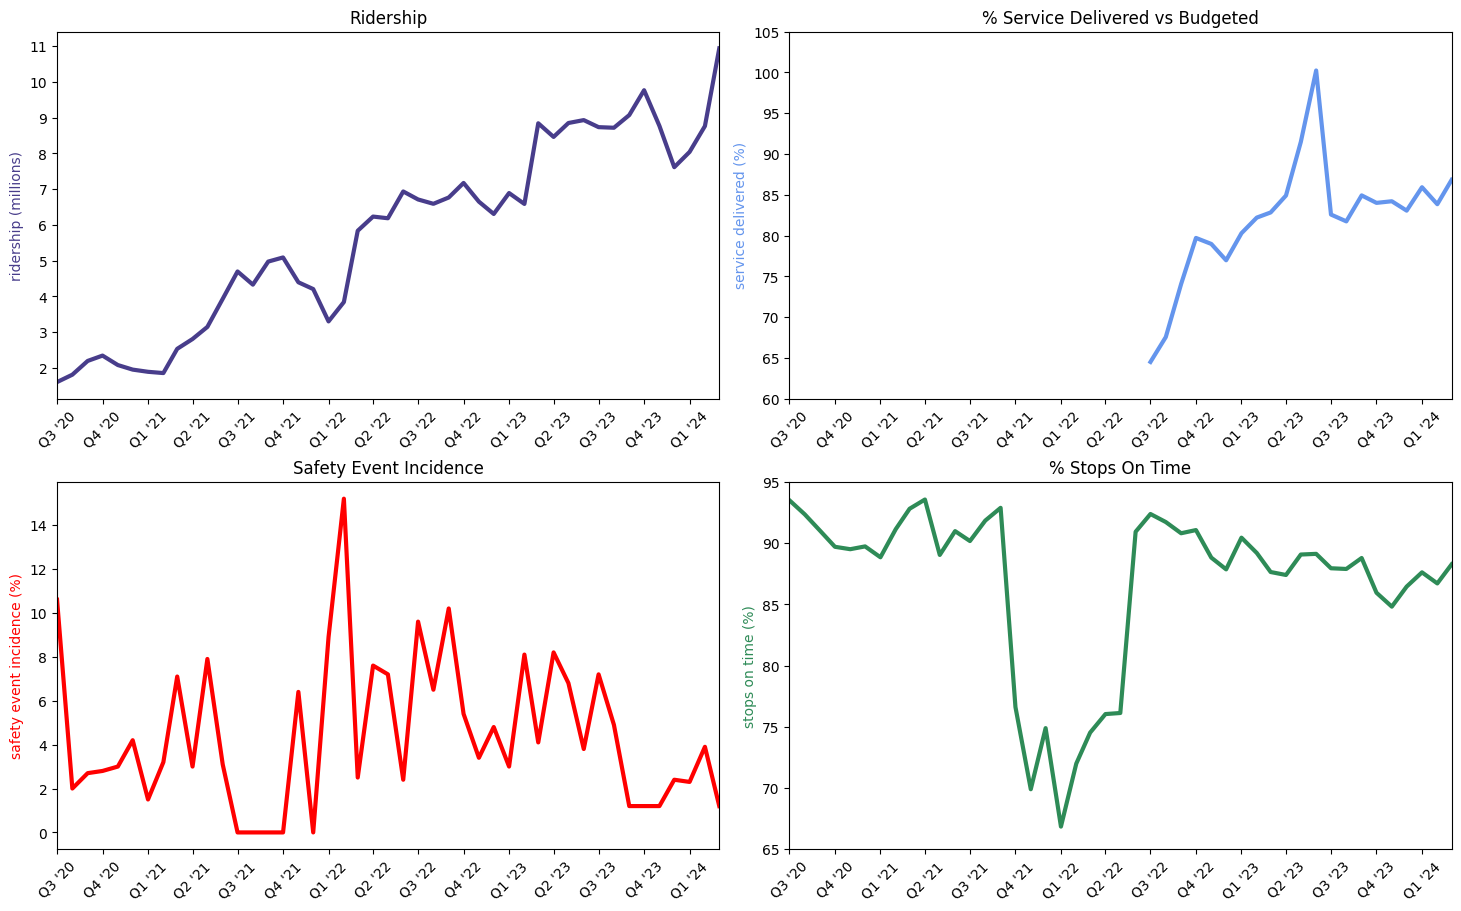

In [87]:
fig, axs = plt.subplots(2,2, layout="constrained")
fig.set_size_inches(14.5, 9)
custom_xticks = (quarters, quarter_labels)
plt.setp(axs, xlim=(months[0], months[-1]))
axs[0,0].plot(months, ridership['Rail ridership\n(TAP ONLY)'], linewidth=3, color='darkslateblue')
axs[0,0].set_title("Ridership")
axs[0,0].tick_params(axis='x', labelrotation=45)
axs[0,0].set_xticks(quarters, quarter_labels)
axs[0,0].set_yticks(np.arange(2000000, 11000001, 1000000), ['2','3','4','5','6','7','8','9','10','11'])
axs[0,0].set_ylabel('ridership (millions)', color='darkslateblue')

axs[0,1].plot(months[24:], rail_service_delivered['% Rail Delivered Stops (vs budgeted)'], linewidth=3, color='cornflowerblue')
axs[0,1].set_title("% Service Delivered vs Budgeted")
axs[0,1].tick_params(axis='x', labelrotation=45)
axs[0,1].set_xticks(quarters, quarter_labels)
axs[0,1].set_yticks(np.arange(.6, 1.051, .05), ['60','65','70','75','80','85','90','95','100','105'])
axs[0,1].set_ylabel('service delivered (%)', color='cornflowerblue')

axs[1,0].plot(months, rail_safety_event_rate['Rail Safety Event Rate'], linewidth=3, color='red')
axs[1,0].set_title("Safety Event Incidence")
axs[1,0].tick_params(axis='x', labelrotation=45)
axs[1,0].set_xticks(quarters, quarter_labels)
axs[1,0].set_ylabel('safety event incidence (%)', color='red')

axs[1,1].plot(months, rail_on_time_perf['% On Time'], linewidth=3, color='seagreen')
axs[1,1].set_title("% Stops On Time")
axs[1,1].tick_params(axis='x', labelrotation=45)
axs[1,1].set_xticks(quarters, quarter_labels)
axs[1,1].set_yticks(np.arange(.65, .951, .05), ['65','70','75','80','85','90','95'])
axs[1,1].set_ylabel('stops on time (%)', color='seagreen')

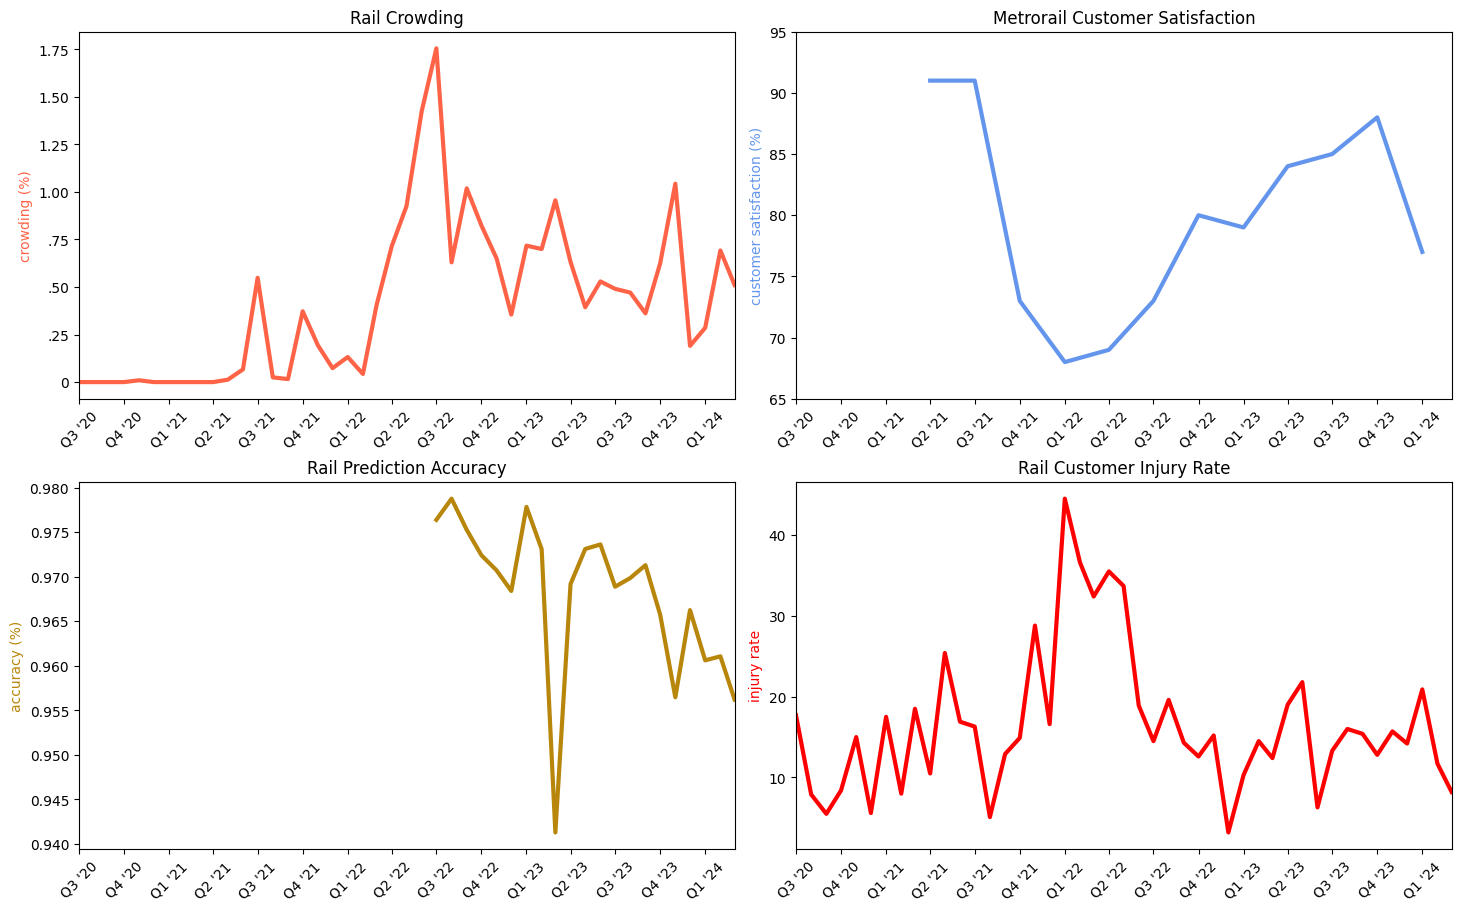

In [88]:
fig, axs = plt.subplots(2,2, layout="constrained")
fig.set_size_inches(14.5, 9)
custom_xticks = (quarters, quarter_labels)
plt.setp(axs, xlim=(months[0], months[-1]))

axs[0,0].plot(months, rail_crowding['% Rail Crowding'], linewidth=3, color='tomato')
axs[0,0].set_title("Rail Crowding")
axs[0,0].tick_params(axis='x', labelrotation=45)
axs[0,0].set_xticks(quarters, quarter_labels)
axs[0,0].set_yticks(np.arange(0, .02, .0025), ['0','.25','.50','.75','1.00','1.25','1.50','1.75'])
axs[0,0].set_ylabel('crowding (%)', color='tomato')

axs[0,1].plot(quarters, satis['Metrorail Customer Satisfaction'], linewidth=3, color='cornflowerblue')
axs[0,1].set_title("Metrorail Customer Satisfaction")
axs[0,1].tick_params(axis='x', labelrotation=45)
axs[0,1].set_xticks(quarters, quarter_labels)
axs[0,1].set_yticks(np.arange(.65, 1, .05), ['65','70','75','80','85','90','95'])
axs[0,1].set_ylabel('customer satisfaction (%)', color='cornflowerblue')

axs[1,0].plot(months[24:], rail_info_accuracy['Rail Prediction Accuracy'], linewidth=3, color='darkgoldenrod')
axs[1,0].set_title("Rail Prediction Accuracy")
axs[1,0].tick_params(axis='x', labelrotation=45)
axs[1,0].set_xticks(quarters, quarter_labels)
axs[1,0].set_ylabel('accuracy (%)', color='darkgoldenrod')

axs[1,1].plot(months, cust_inj_rate['Rail Customer Injury Rate'], linewidth=3, color='red')
axs[1,1].set_title("Rail Customer Injury Rate")
axs[1,1].tick_params(axis='x', labelrotation=45)
axs[1,1].set_xticks(quarters, quarter_labels)
axs[1,1].set_ylabel('injury rate', color='red')

fig.show()

Note the similar dips in __% stops on time__ and __customer satisfaction__ around Q1 '22. Also note the startling spike in customer injury rate and crowding at the same time. This suggests a correlation, but it is important to note that these variables are not truly independent and that it could easily be the case that crowding rate has an influence on customer injury rate or even vice-versa. The similar shapes of the plots are a sign of collinearity, meaning that they may be too closely related to both be used as predictors of a target variable (customer satisfaction for example.)

#### Service Budgeted, Scheduled, and Delivered 

In [30]:
# add an abbreviated month-year colum in "MMM 'YY" format
rail_service_delivered['mon \'yy'] = ""
for index, row in rail_service_delivered.iterrows():
    rail_service_delivered.at[index, 'mon \'yy'] = row['Month'][:3] + " \'" + str(row['Year'])[2:]

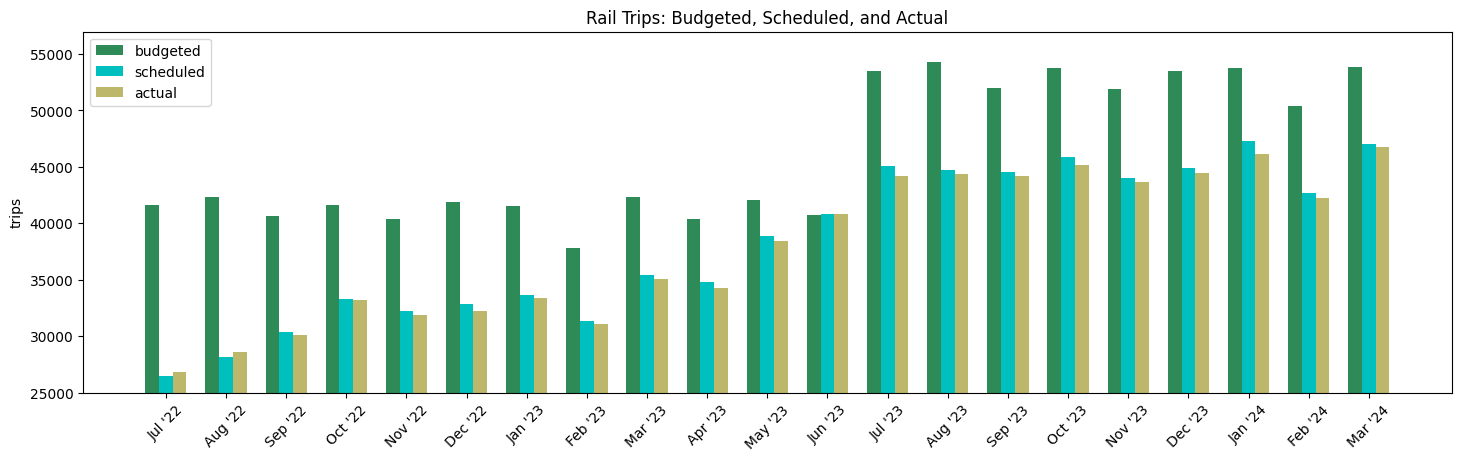

In [31]:
fig, axs = plt.subplots( layout="constrained")
fig.set_size_inches(14.5, 4.5)
plt.rcParams.update({'font.size': 10})
x = np.arange(len(months[24:]))
new_x = np.array([1.75*i for i in x]) # scale x axis to get some space between bars

axs.bar(new_x-0.4, rail_service_delivered['Rail Budgeted Trips'], width=0.4, label="budgeted", color="seagreen")
axs.bar(new_x, rail_service_delivered['Rail Scheduled Trips'], width=0.4, label="scheduled", color="c")
axs.bar(new_x+0.4, rail_service_delivered['Rail Actual Trips'], width=0.4, label="actual", color = "darKkhaki")
axs.set_ylim(bottom=25000)
axs.set_ylabel("trips")
axs.set_xticks(new_x, labels=rail_service_delivered['mon \'yy'])
axs.tick_params(axis='x', labelrotation=45)
axs.set_title("Rail Trips: Budgeted, Scheduled, and Actual")
axs.legend(['budgeted', 'scheduled', 'actual'])
fig.show()

Noteably, there were almost always significantly more trips budgeted than scheduled or actually delivered. The relationship between scheduled and actual trips is much closer and veritable. Since scheduling is done before real-time events such as safety or weather events can be take into account, maybe the difference between scheduled and actual trips could reveal a relationship between _% delivered stops vs scheduled_ and _incidence of safety events_.

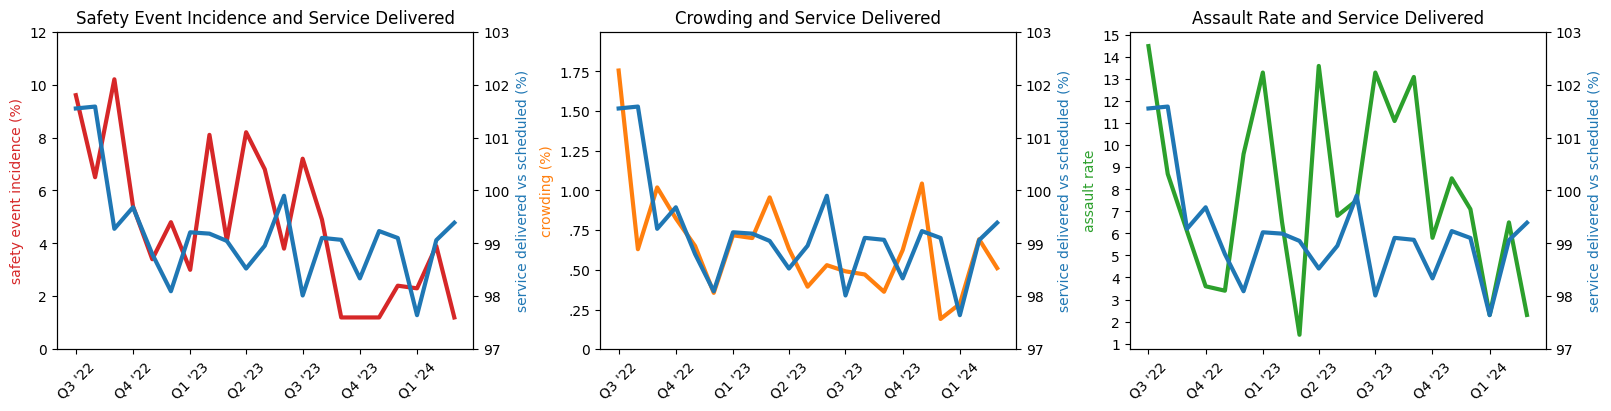

In [89]:
fig, axs = plt.subplots(ncols=3, figsize=(16,4), layout='constrained')
ax02 = axs[0].twinx()
ax12 = axs[1].twinx()
ax22 = axs[2].twinx()

axs[0].set_title("Safety Event Incidence and Service Delivered")
axs[0].set_ylim(0, 12)
axs[0].set_ylabel('safety event incidence (%)', color='tab:red')
axs[0].set_xticks(quarters[8:], quarter_labels[8:])
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].plot(months[24:], rail_safety_event_rate['Rail Safety Event Rate'][24:], linewidth=3, color='tab:red')

ax02.set_ylim(.97, 1.03)
ax02.set_ylabel('service delivered vs scheduled (%)', color='tab:blue')
ax02.set_yticks(np.arange(.97, 1.03, .01), ['97', '98', '99', '100', '101', '102', '103'])
ax02.plot(months[24:], rail_service_delivered['% Rail Delivered Stops (vs scheduled)'], linewidth=3, color='tab:blue')

axs[1].set_title("Crowding and Service Delivered")
axs[1].set_ylim(0, .02)
axs[1].set_ylabel('crowding (%)', color='tab:orange')
axs[1].set_yticks(np.arange(0, .02, .0025), ['0','.25','.50','.75','1.00','1.25','1.50','1.75'])
axs[1].set_xticks(quarters[8:], quarter_labels[8:])
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].plot(months[24:], rail_crowding['% Rail Crowding'][24:], linewidth=3, color='tab:orange')

ax12.set_ylim(.97, 1.03)
ax12.set_ylabel('service delivered vs scheduled (%)', color='tab:blue')
ax12.set_yticks(np.arange(.97, 1.03, .01), ['97', '98', '99', '100', '101', '102', '103'])
ax12.plot(months[24:], rail_service_delivered['% Rail Delivered Stops (vs scheduled)'], linewidth=3, color='tab:blue')

axs[2].set_title("Assault Rate and Service Delivered")
axs[2].set_ylabel('assault rate', color='tab:green')
axs[2].set_yticks(np.arange(0, 20, 1))
axs[2].set_xticks(quarters[8:], quarter_labels[8:])
axs[2].tick_params(axis='x', labelrotation=45)
axs[2].plot(months[24:], assaults['Rail NTD-Reportable Assault Rate'][24:], linewidth=3, color='tab:green')

ax22.set_ylim(.97, 1.03)
ax22.set_ylabel('service delivered vs scheduled (%)', color='tab:blue')
ax22.set_yticks(np.arange(.97, 1.03, .01), ['97', '98', '99', '100', '101', '102', '103'])
ax22.plot(months[24:], rail_service_delivered['% Rail Delivered Stops (vs scheduled)'], linewidth=3, color='tab:blue')

fig.show()

There is a notable inverse relationship between event incidence and % service delivered. Almost every spike in safety event incidence coincided with a proportional drop in % service delivered. No clear relationship found between rail crowding or assault rate and % service delivered.

#### Plot Safety Event Incidence (Y) vs Service Delivered (X)

To examine the relationship between different variables (like % service delivered vs safety event incidence), we'll "throw out" the x axis of time and directly relate the variables at each time. Then we can make scatterplots directly comparing the variables independently of the timeline.

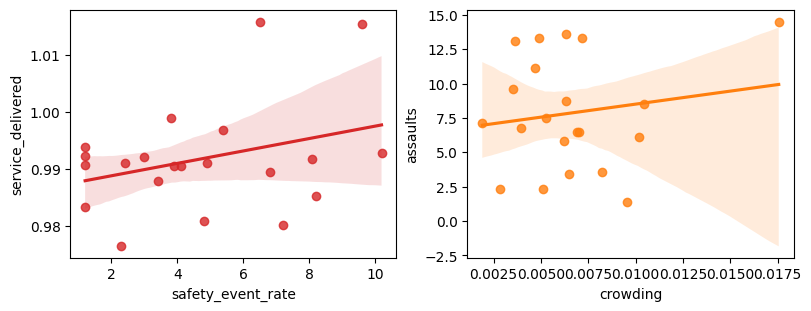

In [80]:
# construct a dataframe relating % service delivered, safety event rate, and crowding %
merge_df = pd.DataFrame()
merge_df['service_delivered'] = rail_service_delivered['% Rail Delivered Stops (vs scheduled)']
safety_event_rate = rail_safety_event_rate['Rail Safety Event Rate'][24:]
safety_event_rate.index = [i for i in range(0,21)]
merge_df.insert(1, 'safety_event_rate', safety_event_rate)

crowding = rail_crowding['% Rail Crowding'][24:]
crowding.index = [i for i in range(0,21)]
merge_df.insert(1, 'crowding', crowding)

assau = assaults['Rail NTD-Reportable Assault Rate'][24:]
assau.index = [i for i in range(0,21)]
merge_df.insert(1, 'assaults', assau)

fig, axes = plt.subplots(ncols=2, figsize=(8,3), layout='constrained')
axes[0].set_ylabel('safety event rate')
axes[0].set_xlabel('service delivered (%)')
axes[1].set_ylabel('assaults')
axes[1].set_xlabel('crowding')

sns.regplot(data=merge_df, x="safety_event_rate", y="service_delivered", color ="tab:red", ax=axes[0])
sns.regplot(data=merge_df, x="crowding", y="assaults", color ="tab:orange", ax=axes[1])
plt.show()

In [75]:
# Correlation of service_delivered to safety_event_rate
print("Correlation of safety event rate to % service delivered: " + str(np.corrcoef(merge_df['service_delivered'], merge_df['safety_event_rate'])[0][1]))
# Correlation of crowding to assaults
print("Correlation of crowding to assault rate: " + str(np.corrcoef(merge_df['assaults'], merge_df['crowding'])[0][1]))

Correlation of safety event rate to % service delivered: 0.31884190461882167
Correlation of crowding  to assault rate: 0.158101834997301


Both relationships are relatively weak but still statistically significant enough to be notable. As crowding increased, assualts increased, as one might expect, but keep in mind with a correlation coefficient of .15, the relationship is not significant. Curiously, as the monthly safety event rate increased, % service delivered increased, which is contrary to what one would assume the relationship would be. As this monthly data is from the narrow time range of Q3 2022 to Q2 2024, it is likely that the sample size is too small for interpretation.